## Neurona Multicapa

#### Funciones de Activacion

In [1]:
import numpy as np

#Activation fucntions for output layer
def logistic(z, derivative=False):
    a = 1/(1 + np.exp(-z))
    if derivative:
        da = np.ones(z.shape)
        return a, da
    return a

def softmax(z, derivative=False):
    e_z = np.exp(z - np.max(z, axis=0))
    a = e_z / np.sum(e_z, axis=0)
    if derivative:
        da = np.ones(z.shape)
        return a, da
    return a

def linear(z, derivative=False):
    a = z
    if derivative:
        da = np.ones(z.shape)
        return a, da
    return a

#Activation functions for hiden layers
def relu(z, derivative=False):
    a = z * (z>=0)
    if derivative:
        da = np.array(z>=0, dtype=float)
        return a, da
    return a

def tanh(z, derivative=False):
    a = np.tanh(z)
    if derivative:
        da = (1-a) * (1+a)
        return a, da
    return a

def logistic_hidden(z, derivative=False):
    a = 1 / (1 + np.exp(-z)) 
    if derivative:
        da = a * (1 - a)
        return a, da
    return a


### Red

In [4]:
class DenseNetwork:
    def __init__(self, layers_dim, hidden_activation=tanh, output_activation=logistic):
        #Atributes
        self.L = len(layers_dim) - 1
        self.w = [None] * (self.L+1)
        self.b = [None] * (self.L+1)
        self.f = [None] * (self.L+1)
        
        #initialize
        for l in range(1, self.L+1):
            self.w[l] = -1 + 2* np.random.rand(layers_dim[l], layers_dim[l-1])
            self.b[l] = -1 + 2* np.random.rand(layers_dim[l],1)
            
            if l == self.L:
                self.f[l] = output_activation
            else:
                self.f[l] = hidden_activation

    def predict(self, X):
        a = X
        for l in range(1, self.L+1):
            z = self.w[l] @ a + self.b[l] #Propaga la salida de la capa a la entrada de la sig
            a = self.f[l](z)
        return a

    def fit(self, X, Y, epochs=500, lr=0.1):
        p = X.shape[1]
        
        for _ in range(epochs):
            #Initializing activations, derivatives and local gradient
            a = [None] * (self.L+1)
            da = [None] * (self.L+1)
            lg = [None] * (self.L+1)
            
            a[0] = X #Capa de entrada o capa 0
            
            #Propagation
            for l in range(1, self.L+1):
                z = self.w[l] @ a[l-1] + self.b[l]
                a[l], da[l] = self.f[l](z, derivative=True)
                
            #Backpropagation
            for l in range(self.L, 0, -1):#Ciclo hacia atras
                if l == self.L:
                    lg[l] = -(Y-a[l]*da[l])
                else:
                    lg[l] = (self.w[l+1].T @ lg[l+1]) * da[l]
            
            for l in range(1, self.L+1):
                self.w[l] -= (lr/p) * (lg[l]@a[l-1].T)
                self.b[l] -= (lr/p) * np.sum(lg[l])

### Ejemplo

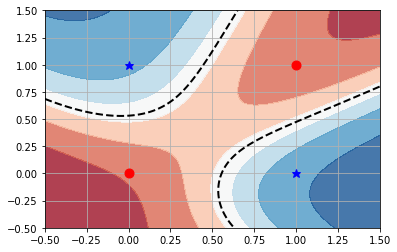

In [8]:
import matplotlib.pyplot as plt

def MLP_binary_classification(X,Y, net):
    plt.figure()
    for i in range(X.shape[1]):
        if Y[0,i] == 0:
            plt.plot(X[0,i], X[1,i], 'ro', markersize=9)
        else:
            plt.plot(X[0,i], X[1,i], 'b*', markersize=9)

    xmin, ymin = np.min(X[0, :])-0.5, np.min(X[1, :])-0.5
    xmax, ymax = np.max(X[0, :])+0.5, np.max(X[1, :])+0.5

    xx, yy = np.meshgrid(np.linspace(xmin ,xmax, 100), np.linspace(ymin, ymax, 100))

    data = [xx.ravel(), yy.ravel()]
    zz = net.predict(data)
    zz = zz.reshape(xx.shape)

    plt.contour(xx, yy, zz, [0.5], colors='k', linestyles='--', linewidths=2)
    plt.contourf(xx, yy, zz, alpha=0.8, cmap=plt.cm.RdBu)
    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])
    plt.grid()
    plt.show()

X = np.array([[0, 0, 1, 1],[0, 1, 0, 1]])
Y = np.array([[0, 1, 1, 0]])

#2 entradas, 10 ocultas, 2 salidas
net = DenseNetwork((2,10,1))
net.fit(X, Y, epochs=500)
MLP_binary_classification(X,Y, net)
